<a href="https://colab.research.google.com/github/coder360-crypto/ARIMA-GARCH-BASED-STRATEGY-FOR-INDIAN-MARKETS/blob/main/ARIMA_BASED_STRATEGY_FOR_INDIAN_MARKETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install statsmodels
!pip install pmdarima
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 15.9 MB/s eta 0:00:00


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
import arch
from arch import arch_model

In [6]:
start_date = "2022-12-01"
end_date = "2023-01-31"
stock_symbol = "RELIANCE.NS"

data = yf.download(stock_symbol, start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-01,2741.800049,2755.000000,2716.000000,2723.300049,2723.300049,4377696
2022-12-02,2730.000000,2748.000000,2700.600098,2722.149902,2722.149902,5348595
2022-12-05,2712.000000,2716.750000,2678.000000,2682.449951,2682.449951,6843367
2022-12-06,2665.100098,2697.000000,2661.000000,2690.199951,2690.199951,3966243
2022-12-07,2685.000000,2695.000000,2642.149902,2650.500000,2650.500000,3905263
2022-12-08,2660.000000,2665.000000,2640.100098,2649.250000,2649.250000,3579858
2022-12-09,2646.000000,2660.000000,2601.850098,2609.100098,2609.100098,5840633
2022-12-12,2585.500000,2623.000000,2585.000000,2613.100098,2613.100098,4374946
2022-12-13,2613.100098,2633.000000,2606.699951,2625.000000,2625.000000,3845839


In [26]:
model = auto_arima(data["Close"], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(data["Close"])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=394.694, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=393.498, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=395.465, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=395.454, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=395.425, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.800 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [32]:
# Set the prediction period
prediction_start = "2023-02-01"
prediction_end = "2023-05-31"

# Generate the prediction index
prediction_index = pd.date_range(start=prediction_start, end=prediction_end, freq="B")


In [33]:
forecast = model.predict(n_periods=len(prediction_index))
forecast = forecast.tolist()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[2350.8829256383383,
 2342.0158512766766,
 2333.148776915015,
 2324.281702553353,
 2315.4146281916915,
 2306.5475538300298,
 2297.680479468368,
 2288.8134051067063,
 2279.9463307450446,
 2271.079256383383,
 2262.212182021721,
 2253.3451076600595,
 2244.478033298398,
 2235.610958936736,
 2226.7438845750744,
 2217.8768102134127,
 2209.009735851751,
 2200.1426614900893,
 2191.2755871284276,
 2182.408512766766,
 2173.541438405104,
 2164.6743640434424,
 2155.8072896817807,
 2146.940215320119,
 2138.0731409584573,
 2129.2060665967956,
 2120.338992235134,
 2111.471917873472,
 2102.6048435118105,
 2093.737769150149,
 2084.870694788487,
 2076.0036204268254,
 2067.1365460651637,
 2058.269471703502,
 2049.4023973418402,
 2040.5353229801788,
 2031.6682486185173,
 2022.8011742568558,
 2013.9340998951943,
 2005.0670255335328,
 1996.1999511718714,
 1987.3328768102099,
 1978.4658024485484,
 1969.598728086887,
 1960.7316537252254,
 1951.864579363564,
 1942.9975050019025,
 1934.130430640241,
 1925.26335

In [34]:
# Create a DataFrame with the prediction results
prediction_data = pd.DataFrame(forecast, index=prediction_index, columns=["Prediction"])


prediction_data

,Prediction
2023-02-01,2350.882926
2023-02-02,2342.015851
2023-02-03,2333.148777
2023-02-06,2324.281703
2023-02-07,2315.414628
...,...
2023-05-25,1632.649902
2023-05-26,1623.782828
2023-05-29,1614.915754
2023-05-30,1606.048679


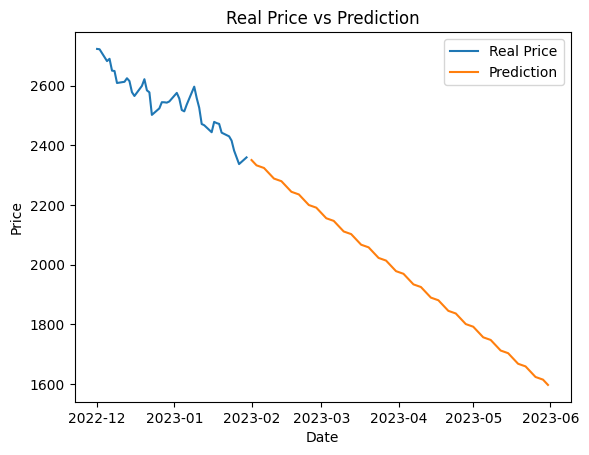

In [35]:
# Plot the real price and prediction
plt.plot(data.index, data["Close"], label="Real Price")
plt.plot(prediction_data.index, prediction_data["Prediction"], label="Prediction")
plt.legend()
plt.title("Real Price vs Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [36]:
positions = np.where(forecast > data["Close"].tolist() , 1 ,-1)

In [37]:
positions

array(-1)

In [ ]:
returns = np.diff(data["Close"]) * positions[:-1]
cumulative_returns = np.cumsum(returns)

In [ ]:
profit = (cumulative_returns[-1] / data["Close"].iloc[0]) * 100
beta = np.cov(returns, data["Close"].diff().values[:-1])[0, 1] / np.var(data["Close"].diff().values[:-1])
sharpe_ratio = np.sqrt(252) * np.mean(returns) / np.std(returns)

In [ ]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(data, n_fast=12, n_slow=26):
    ema_fast = data.ewm(span=n_fast, adjust=False).mean()
    ema_slow = data.ewm(span=n_slow, adjust=False).mean()
    macd = ema_fast - ema_slow
    signal_line = macd.ewm(span=9, adjust=False).mean()
    return macd, signal_line

def calculate_obv(data):
    obv = np.where(data.diff() > 0, data.diff(), 0).sum()
    return obv



In [ ]:
data["RSI"] = calculate_rsi(data["Close"])
data["MACD"], data["Signal_Line"] = calculate_macd(data["Close"])
data["OBV"] = calculate_obv(data["Close"])


In [ ]:
data["RSI_Filter"] = np.where(data["RSI"] > 70, -1, np.where(data["RSI"] < 30, 1, 0))
data["MACD_Filter"] = np.where(data["MACD"] > data["Signal_Line"], 1, -1)
data["OBV_Filter"] = np.where(data["OBV"] > data["OBV"].shift(), 1, -1)
data["Combined_Filter"] = data["RSI_Filter"] + data["MACD_Filter"]

filtered_positions = np.where(data["Combined_Filter"] > 0, 1, -1)
filtered_returns = np.diff(data["Close"]) * filtered_positions[:-1]
filtered_cumulative_returns = np.cumsum(filtered_returns)
filtered_profit = (filtered_cumulative_returns[-1] / data["Close"].iloc[0]) * 100
filtered_sharpe_ratio = np.sqrt(252) * np.mean(filtered_returns) / np.std(filtered_returns)

print("Filtered Profit: {:.2f}%".format(filtered_profit))
print("Filtered Sharpe Ratio: {:.2f}".format(filtered_sharpe_ratio))


In [ ]:
volatility_model = arch_model(data["Close"].pct_change().dropna(), vol='Garch', p=1, q=1)
volatility_res = volatility_model.fit(disp='off')
forecast_volatility = volatility_res.forecast(horizon=len(data)-1)

In [ ]:
nifty50_data = yf.download("^NSEI", start=start_date, end=end_date)
sensex_data = yf.download("^BSESN", start=start_date, end=end_date)

nifty50_volatility_model = arch_model(nifty50_data["Close"].pct_change().dropna(), vol='Garch', p=1, q=1)
nifty50_volatility_res = nifty50_volatility_model.fit(disp='off')
nifty50_forecast_volatility = nifty50_volatility_res.forecast(horizon=len(nifty50_data)-1)

sensex_volatility_model = arch_model(sensex_data["Close"].pct_change().dropna(), vol='Garch', p=1, q=1)
sensex_volatility_res = sensex_volatility_model.fit(disp='off')
sensex_forecast_volatility = sensex_volatility_res.forecast(horizon=len(sensex_data)-1)


In [ ]:
plt.plot(data.index[1:], np.sqrt(volatility_res.conditional_volatility), label="RELIANCE")
plt.plot(nifty50_data.index[1:], np.sqrt(nifty50_volatility_res.conditional_volatility), label="NIFTY50")
plt.plot(sensex_data.index[1:], np.sqrt(sensex_volatility_res.conditional_volatility), label="SENSEX")
plt.legend()
plt.title

plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


In [ ]:
plt.plot(data.index, data["Close"], label="RELIANCE")
plt.plot(data.index, forecast, label="Forecast")
plt.legend()
plt.title("RELIANCE Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [ ]:
plt.plot(data.index, filtered_positions, label="Filtered Positions")
plt.legend()
plt.title("Filtered Positions")
plt.xlabel("Date")
plt.ylabel("Position")
plt.show()